In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [10]:
#Reading the distance data from text file into dataframe X
file_path = 'all_pairwise_distances.txt'

with open(file_path, 'r') as file:
    lines = file.readlines()

data = [list(map(float, line.strip().split())) for line in lines]

X = pd.DataFrame(data)

print(X.shape)

(70, 22218)


In [12]:
X

,0,1,2,3,4,5,6,7,8,9,...,22208,22209,22210,22211,22212,22213,22214,22215,22216,22217
0,1.000000,37.643060,33.120990,72.006944,66.730802,100.647901,99.724621,110.168053,108.521887,107.703296,...,288.849442,287.471738,252.121003,251.730014,263.229938,266.595199,265.572965,269.809192,259.326050,263.501423
1,2.236068,74.249579,41.629317,127.062977,99.849887,150.083310,144.031247,162.249807,159.380049,159.028299,...,151.327460,151.489274,113.529732,95.021050,40.607881,44.011362,35.341194,42.438190,6.403124,12.649111
2,1.414214,39.962482,29.966648,78.409183,66.128662,110.059075,49.819675,119.854078,45.177428,116.777566,...,223.573254,232.948492,138.311243,142.635900,59.808026,57.939624,62.801274,60.000000,17.888544,8.000000
3,1.414214,64.031242,40.311289,113.701363,89.988888,132.849539,134.134261,146.054784,146.768525,142.014084,...,158.154987,168.190368,177.654158,182.060430,214.238185,219.009132,217.278623,211.021326,238.411409,241.298570
4,5.385165,34.655447,38.587563,69.892775,72.449983,101.710373,61.188234,111.018017,59.682493,110.018180,...,81.835200,75.802375,105.385008,53.712196,145.907505,124.867930,148.606864,133.689940,174.132134,152.315462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,24.083189,58.694122,35.014283,74.040529,97.020616,65.764732,147.085009,66.219333,165.109055,66.407831,...,43.081318,39.395431,30.479501,36.138622,27.802878,28.017851,26.400758,25.495098,25.612497,28.844410
66,41.194660,37.121422,21.931712,69.526973,68.249542,74.249579,92.048900,79.906195,98.671171,77.077883,...,82.873397,81.841310,43.931765,83.384651,29.832868,34.713110,37.443290,33.541020,31.048349,15.231546
67,12.649111,28.635642,30.413813,63.568860,67.742158,68.709534,90.022219,74.323617,97.082439,72.615425,...,65.620119,38.327536,49.648766,16.970563,30.463092,16.278821,28.460499,13.152946,34.669872,37.576588
68,4.000000,32.202484,40.311289,71.168813,77.491935,89.286057,112.160599,97.529483,124.016128,96.540147,...,56.515485,14.000000,48.662100,22.671568,33.526109,11.180340,29.427878,9.486833,46.754679,29.120440


In [14]:
#classification dataFrame Y
data=[1]*30+[0]*40
Y=pd.DataFrame(data)
print(Y)


    0
0   1
1   1
2   1
3   1
4   1
.. ..
65  0
66  0
67  0
68  0
69  0

[70 rows x 1 columns]


In [16]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,22208,22209,22210,22211,22212,22213,22214,22215,22216,22217
0,1.000000,37.643060,33.120990,72.006944,66.730802,100.647901,99.724621,110.168053,108.521887,107.703296,...,288.849442,287.471738,252.121003,251.730014,263.229938,266.595199,265.572965,269.809192,259.326050,263.501423
1,2.236068,74.249579,41.629317,127.062977,99.849887,150.083310,144.031247,162.249807,159.380049,159.028299,...,151.327460,151.489274,113.529732,95.021050,40.607881,44.011362,35.341194,42.438190,6.403124,12.649111
2,1.414214,39.962482,29.966648,78.409183,66.128662,110.059075,49.819675,119.854078,45.177428,116.777566,...,223.573254,232.948492,138.311243,142.635900,59.808026,57.939624,62.801274,60.000000,17.888544,8.000000
3,1.414214,64.031242,40.311289,113.701363,89.988888,132.849539,134.134261,146.054784,146.768525,142.014084,...,158.154987,168.190368,177.654158,182.060430,214.238185,219.009132,217.278623,211.021326,238.411409,241.298570
4,5.385165,34.655447,38.587563,69.892775,72.449983,101.710373,61.188234,111.018017,59.682493,110.018180,...,81.835200,75.802375,105.385008,53.712196,145.907505,124.867930,148.606864,133.689940,174.132134,152.315462


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Columns: 22218 entries, 0 to 22217
dtypes: float64(22218)
memory usage: 11.9 MB


In [19]:
import numpy as np
np.array(X)

array([[  1.      ,  37.64306 ,  33.12099 , ..., 269.809192, 259.32605 ,
        263.501423],
       [  2.236068,  74.249579,  41.629317, ...,  42.43819 ,   6.403124,
         12.649111],
       [  1.414214,  39.962482,  29.966648, ...,  60.      ,  17.888544,
          8.      ],
       ...,
       [ 12.649111,  28.635642,  30.413813, ...,  13.152946,  34.669872,
         37.576588],
       [  4.      ,  32.202484,  40.311289, ...,   9.486833,  46.754679,
         29.12044 ],
       [ 13.453624,  21.931712,  22.803509, ...,  32.388269,  22.472205,
         22.847319]])

In [22]:
#Decision Tree Classifier
cv = LeaveOneOut()
predictions = []

model = DecisionTreeClassifier()
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions.append(y_pred[0])
print(predictions)
accuracy = accuracy_score(Y, predictions)

print(f"Accuracy: {accuracy}")

[1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Accuracy: 0.8


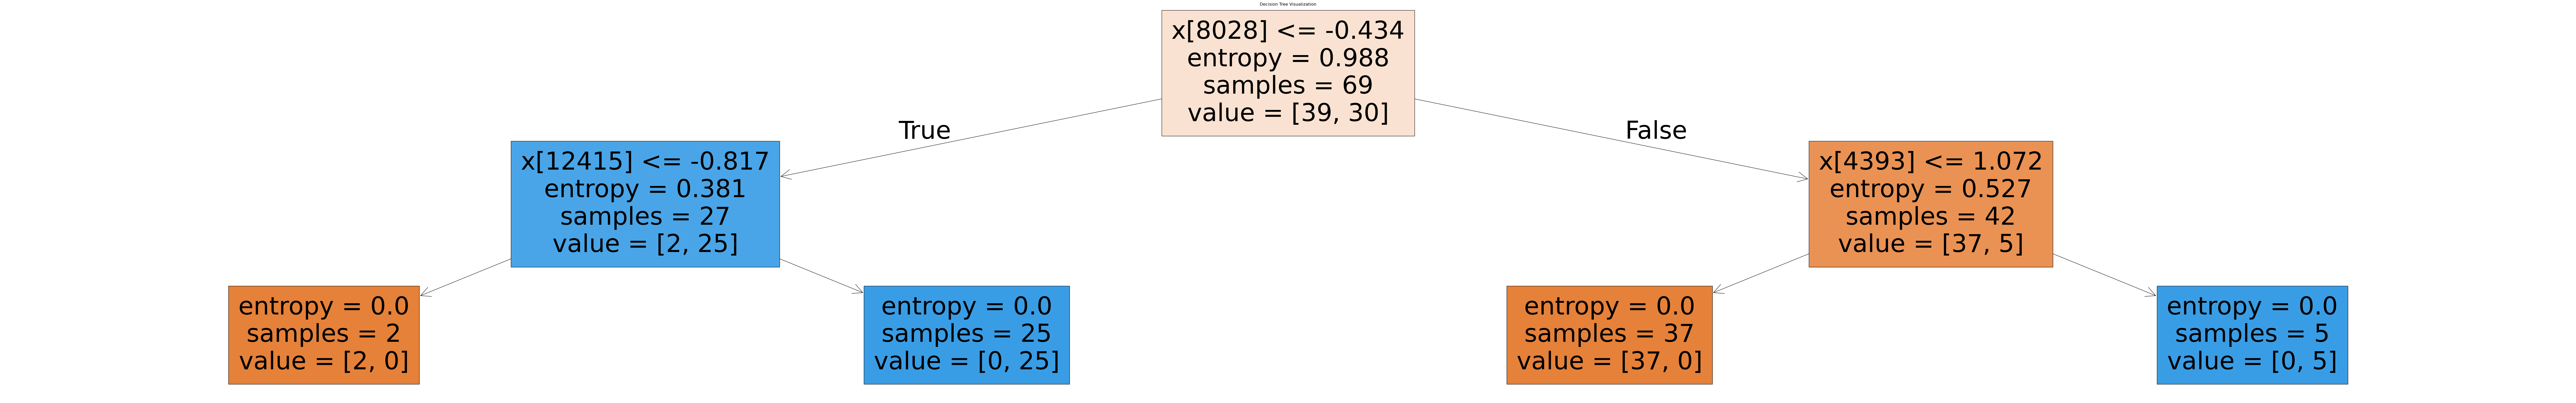

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming x_train and y_train are your training data
# Instantiate the DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Fit the classifier on the training data
classifier.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(130, 20))
plot_tree(classifier, filled=True )
plt.title("Decision Tree Visualization")
plt.show()


In [29]:
#LinearSVC

cv = LeaveOneOut()
predictions = []

model = LinearSVC(max_iter=10000)

scaler = StandardScaler()
X1 = scaler.fit_transform(X)

for train_index, test_index in cv.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    model.fit(X_train, np.ravel(y_train))
    y_pred = model.predict(X_test)
    predictions.append(y_pred[0])

print(predictions)
accuracy = accuracy_score(np.ravel(Y), predictions)

print(f"Accuracy: {accuracy}")

[1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy: 0.9285714285714286


In [31]:
#Logistic Regression

cv = LeaveOneOut()
predictions = []

model = LogisticRegression(max_iter=1000)

scaler = StandardScaler()
X1 = scaler.fit_transform(X)

for train_index, test_index in cv.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    model.fit(X_train, np.ravel(y_train))
    y_pred = model.predict(X_test)
    predictions.append(y_pred[0])

print(predictions)
accuracy = accuracy_score(np.ravel(Y), predictions)

print(f"Accuracy: {accuracy}")

[1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy: 0.9428571428571428


In [36]:
#voting based model
cv = LeaveOneOut()
predictions = []

model1 = LogisticRegression(random_state=1, solver='newton-cg', max_iter=1000)
model2 = DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')

for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Reshape target variable
    y_train = y_train.values.ravel()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions.append(y_pred[0])

print(predictions)
accuracy = accuracy_score(Y.values.ravel(), predictions)

print(f"Accuracy: {accuracy}")


[1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy: 0.9


In [33]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
cv = LeaveOneOut()
predictions = []
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    model.fit(X_train, np.ravel(y_train))
    y_pred = model.predict(X_test)
    predictions.append(y_pred[0])

print(predictions)
accuracy = accuracy_score(np.ravel(Y), predictions)

print(f"Accuracy: {accuracy}")


[1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy: 0.9428571428571428
